In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack

from scipy.interpolate import interp2d

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

(50, 100)
99


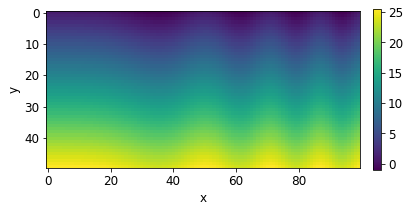

In [16]:
xx, yy = np.meshgrid(np.arange(100), np.arange(50))
print(xx.shape)
print(xx.max())

# data = xx**2/200 + yy
data = np.cos(xx**2/400) + yy/2

im = plt.imshow(data)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

__Downsize the image__

(48, 96)


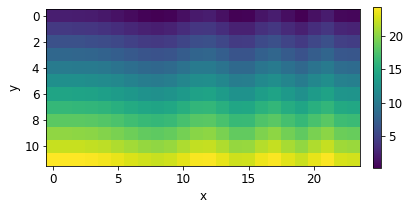

In [17]:
data1 = data.copy()

# trim edges to enable downsizing
# trimmed image size need to be multiples of binsize
trim_size_x = 2
trim_size_y = 1
data1 = data1[trim_size_y:(data1.shape[0]-trim_size_y), trim_size_x:(data1.shape[1]-trim_size_x)]
print(data1.shape)

# downsize the image to speed up gaussian filter
binsize = 4  # no downsizing
data1 = data1.reshape((data1.shape[0]//binsize, binsize, data1.shape[1]//binsize,-1)).mean(axis=3).mean(1)
x_small_grid = trim_size_x + binsize/2+binsize*np.arange(data1.shape[1])
y_small_grid = trim_size_y + binsize/2+binsize*np.arange(data1.shape[0])

im = plt.imshow(data1)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

__Upsize the downsized image__

In [18]:
interp_func = interp2d(x_small_grid, y_small_grid, data1, kind='linear')
x_grid, y_grid = np.arange(data.shape[1]), np.arange(data.shape[0])
data_reconstruct = interp_func(x_grid, y_grid).reshape(data.shape)

reconstructed image:


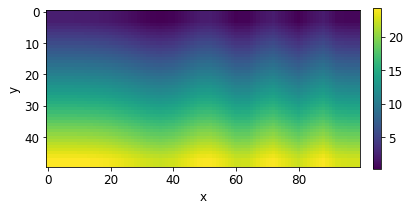

residual:


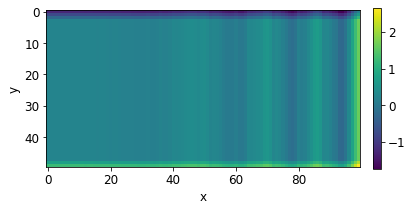

In [19]:
print('reconstructed image:')
im = plt.imshow(data_reconstruct)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('residual:')
im = plt.imshow(data - data_reconstruct)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()